In [ ]:
import time
import matplotlib.pyplot as plt

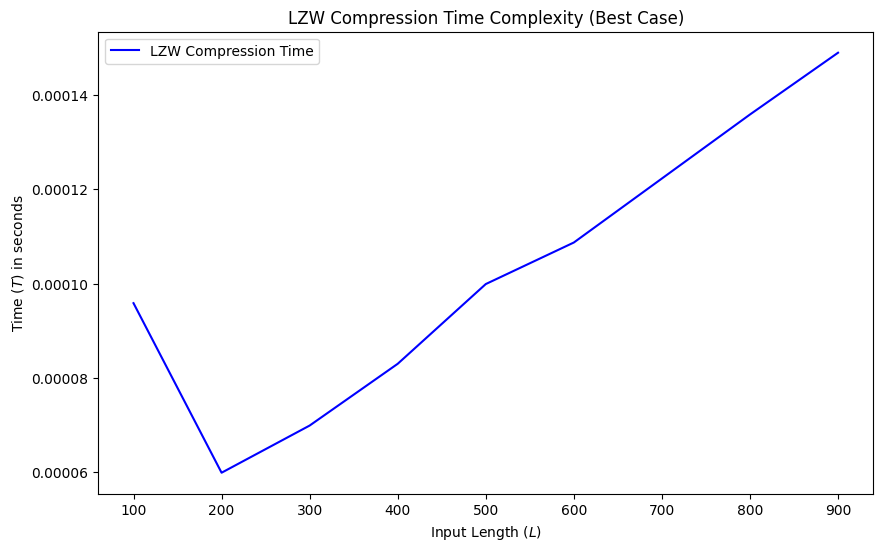

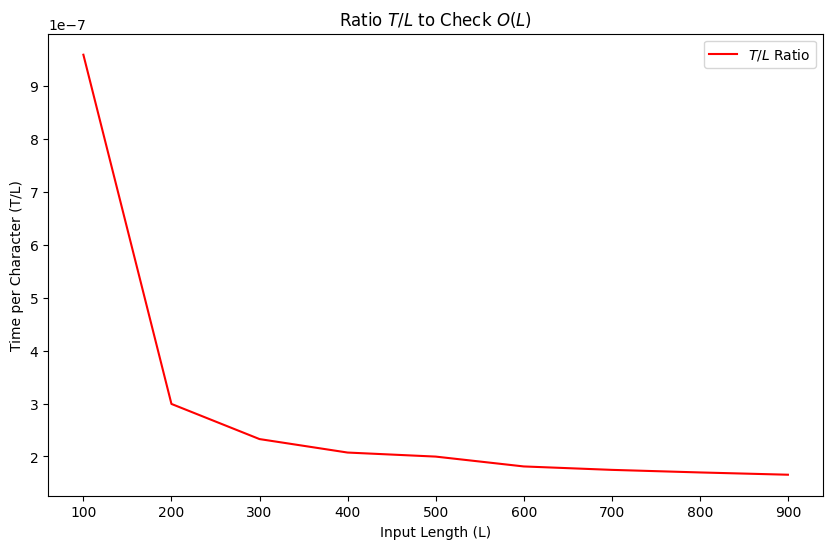

In [ ]:
def lzw_compress(input_text):
    dictionary = {chr(i): i for i in range(256)}
    dict_size = 256
    w = ""
    compressed_data = []

    for c in input_text:
        wc = w + c
        if wc in dictionary:
            w = wc
        else:
            compressed_data.append(dictionary[w])
            dictionary[wc] = dict_size
            dict_size += 1
            w = c

    if w:
        compressed_data.append(dictionary[w])
    return compressed_data


def generate_repetitive_text(pattern, length):
    return (pattern * (length // len(pattern) + 1))[:length]


def measure_time_lzw_best_case():
    lengths = [i for i in range(100,1000,100)]
    times = []
    ratios = []
    pattern = "abc"  # Mẫu lặp

    for length in lengths:
        text = generate_repetitive_text(pattern, length)
        start_time = time.time()
        lzw_compress(text)
        end_time = time.time()
        time_taken = end_time - start_time
        times.append(time_taken)
        ratios.append(time_taken / length)  # Tính T/L

    return lengths, times, ratios

# Đo thời gian
lengths, times, ratios = measure_time_lzw_best_case()

# Vẽ đồ thị thời gian chạy
plt.figure(figsize=(10, 6))
plt.plot(lengths, times, color='b', label='LZW Compression Time')
plt.title('LZW Compression Time Complexity (Best Case)')
plt.xlabel(r'Input Length ($L$)')
plt.ylabel(r'Time ($T$) in seconds')
plt.legend()

# Vẽ đồ thị T/L
plt.figure(figsize=(10, 6))
plt.plot(lengths, ratios, color='r', label=r'$T/L$ Ratio')
plt.title(r'Ratio $T / (L * M)$ to Check O(L * M) (Worst Case)')
plt.xlabel('Input Length (L)')
plt.ylabel('Time per Character (T/L)')
plt.legend()

plt.show()


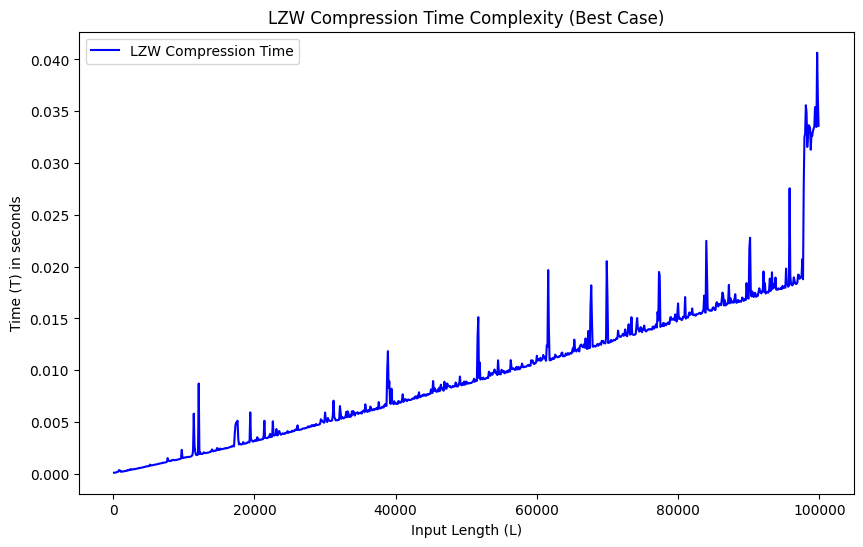

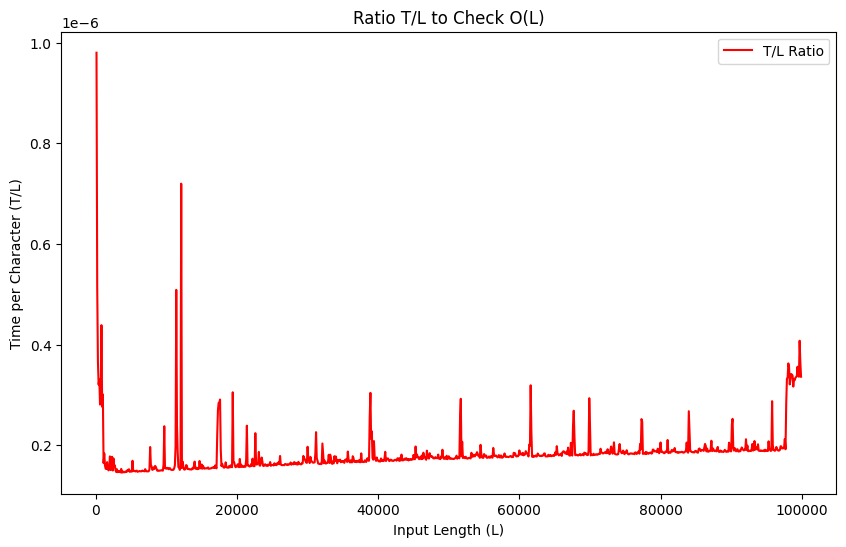

In [ ]:
def lzw_compress(input_text):
    dictionary = {chr(i): i for i in range(256)}
    dict_size = 256
    w = ""
    compressed_data = []

    for c in input_text:
        wc = w + c
        if wc in dictionary:
            w = wc
        else:
            compressed_data.append(dictionary[w])
            dictionary[wc] = dict_size
            dict_size += 1
            w = c

    if w:
        compressed_data.append(dictionary[w])
    return compressed_data


def generate_repetitive_text(pattern, length):
    return (pattern * (length // len(pattern) + 1))[:length]


def measure_time_lzw_best_case():
    lengths = [i for i in range(100,100000,100)]
    times = []
    ratios = []
    pattern = "ab"  # Mẫu lặp

    for length in lengths:
        text = generate_repetitive_text(pattern, length)
        start_time = time.time()
        lzw_compress(text)
        end_time = time.time()
        time_taken = end_time - start_time
        times.append(time_taken)
        ratios.append(time_taken / length)  # Tính T/L

    return lengths, times, ratios

# Đo thời gian
lengths, times, ratios = measure_time_lzw_best_case()

# Vẽ đồ thị thời gian chạy
plt.figure(figsize=(10, 6))
plt.plot(lengths, times, color='b', label='LZW Compression Time')
plt.title('LZW Compression Time Complexity (Best Case)')
plt.xlabel('Input Length (L)')
plt.ylabel('Time (T) in seconds')
plt.legend()

# Vẽ đồ thị T/L
plt.figure(figsize=(10, 6))
plt.plot(lengths, ratios, color='r', label='T/L Ratio')
plt.title('Ratio T/L to Check O(L)')
plt.xlabel('Input Length (L)')
plt.ylabel('Time per Character (T/L)')
plt.legend()

plt.show()


In [ ]:
!pip install lorem-text

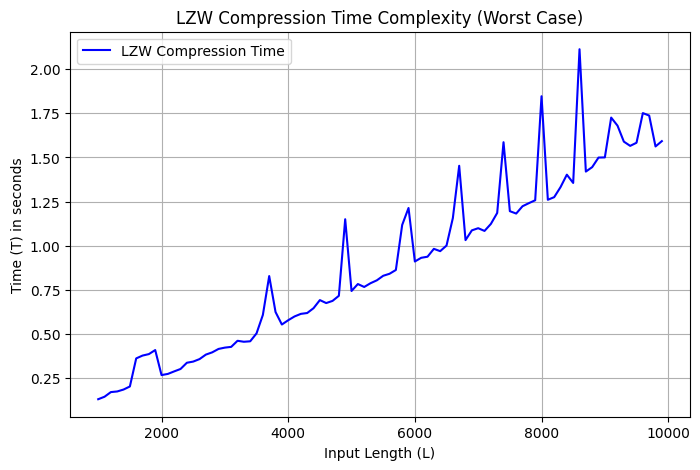

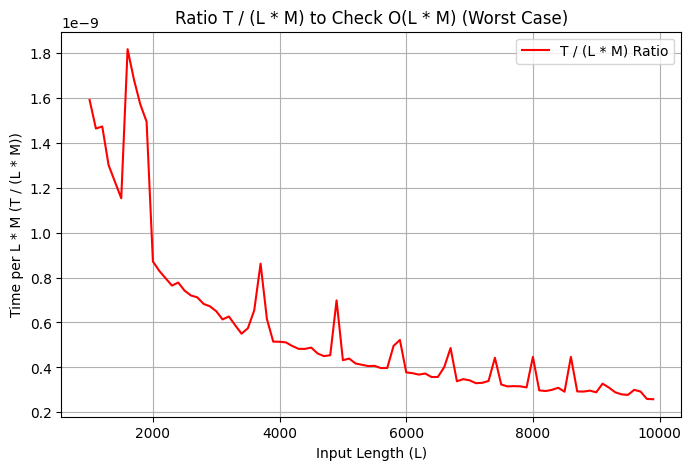

In [ ]:
from lorem_text import lorem

def lzw_compress_with_dict_size(input_text):
    dictionary = {chr(i): i for i in range(256)}
    dict_size = 256
    w = ""
    compressed_data = []

    for c in input_text:
        wc = w + c
        if wc in dictionary:
            w = wc
        else:
            compressed_data.append(dictionary[w])
            dictionary[wc] = dict_size
            dict_size += 1
            w = c

    if w:
        compressed_data.append(dictionary[w])
    return compressed_data, len(dictionary)

def generate_non_repetitive_text(length):
    return lorem.paragraphs(length)


def measure_time_lzw_and_check_OLM():
    lengths = [i for i in range(1000,10000,100)]
    times = []
    ratios = []

    for length in lengths:
        text = generate_non_repetitive_text(length)
        start_time = time.time()
        _, dict_size = lzw_compress_with_dict_size(text)
        end_time = time.time()
        time_taken = end_time - start_time
        times.append(time_taken)
        ratios.append(time_taken / (length * dict_size))  # Tính T / (L * M)

    return lengths, times, ratios

# Đo thời gian và tính tỉ lệ T / (L * M)
lengths, times, ratios = measure_time_lzw_and_check_OLM()

# Vẽ đồ thị thời gian chạy
plt.figure(figsize=(8, 5))
plt.plot(lengths, times, color='b', label='LZW Compression Time')
plt.title('LZW Compression Time Complexity (Worst Case)')
plt.xlabel('Input Length (L)')
plt.ylabel('Time (T) in seconds')
plt.grid(True)
plt.legend()

# Vẽ đồ thị T / (L * M)
plt.figure(figsize=(8, 5))
plt.plot(lengths, ratios, color='r', label='T / (L * M) Ratio')
plt.title('Ratio T / (L * M) to Check O(L * M) (Worst Case)')
plt.xlabel('Input Length (L)')
plt.ylabel('Time per L * M (T / (L * M))')
plt.grid(True)
plt.legend()

plt.show()